In [30]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Spotify EDA

[download Spotify data set](https://www.kaggle.com/geomack/spotifyclassification/data#)

1. Import data set
2. EDA to data visualization and observe structure
3. Train a classifier ( Decision Tree )
4. Perdict target using trained classifier


In [7]:
data = pd.read_csv("data/data.csv",index_col=0)

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [12]:
data.tail(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2007,0.002170,0.639,296276,0.978,0.112000,11,0.0838,-2.376,1,0.0730,144.986,4.0,0.494,0,Let It Go - Scott Melker & Mister Gray Remix,NERVO
2008,0.054100,0.646,160408,0.714,0.000000,0,0.1340,-6.511,1,0.0378,97.957,4.0,0.589,0,"Call On Me - EDWYNN X TIKAL, Spirix Remix",Starley
2009,0.004990,0.595,224000,0.837,0.035900,1,0.1010,-6.011,1,0.0696,149.964,4.0,0.331,0,Aamon,Kuuro
2010,0.002310,0.624,206013,0.971,0.121000,6,0.2550,-0.935,0,0.0643,102.003,4.0,0.442,0,Hey Baby - Steve Aoki Remix,Dimitri Vegas & Like Mike
2011,0.000586,0.528,245053,0.879,0.004890,6,0.0432,-5.891,0,0.1200,128.268,4.0,0.327,0,Brightside - Borgeous Remix,Icona Pop
2012,0.001060,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.087700,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.008570,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.001640,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,0.002810,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.1410,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [10]:
data.shape

(2017, 16)

In [11]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

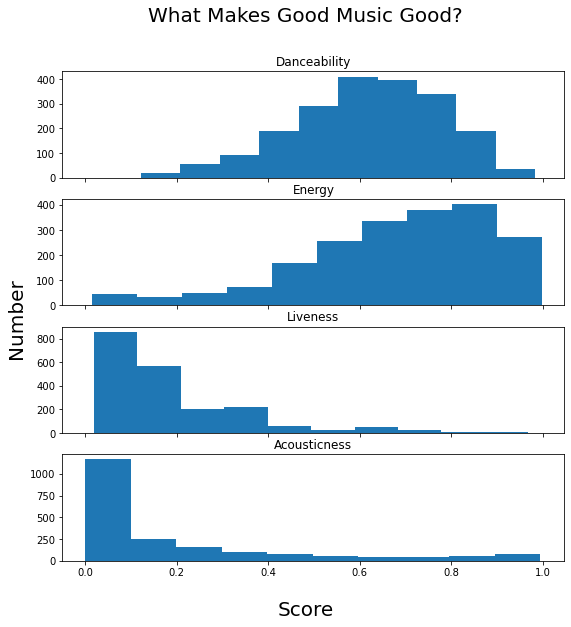

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Score', ha='center',size=20)
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical',size=20)
axs[0].hist(data['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(data['energy'])
axs[1].set_title('Energy')
axs[2].hist(data['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(data['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle('What Makes Good Music Good?',size=20)
plt.show()

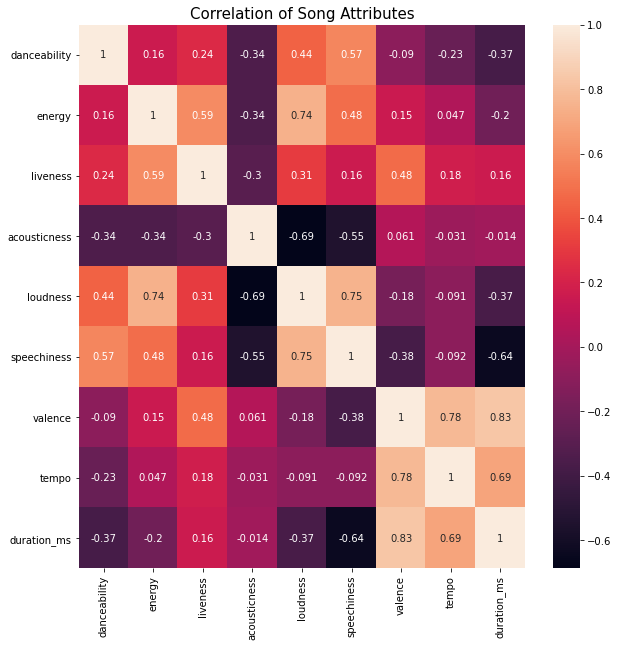

In [15]:
# Heatmap
top10=data.iloc[0:10]
top10=top10[['danceability','energy','liveness',
             'acousticness','loudness','speechiness',
             'valence','tempo','duration_ms']]
corr=top10.corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation of Song Attributes",size=15)
plt.show("Correlation of Song Attributes")

In [20]:
train, test = train_test_split(data,test_size= 0.15)

In [21]:
print("Train size : ", train.shape[0])
print("Test size : ", test.shape[0])

Train size :  1714
Test size :  303


In [24]:
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [26]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_danceability = data[data['target'] == 1]['danceability']
neg_danceability = data[data['target'] == 0]['danceability']

pos_duration_ms = data[data['target'] == 1]['duration_ms']
neg_duration_ms = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

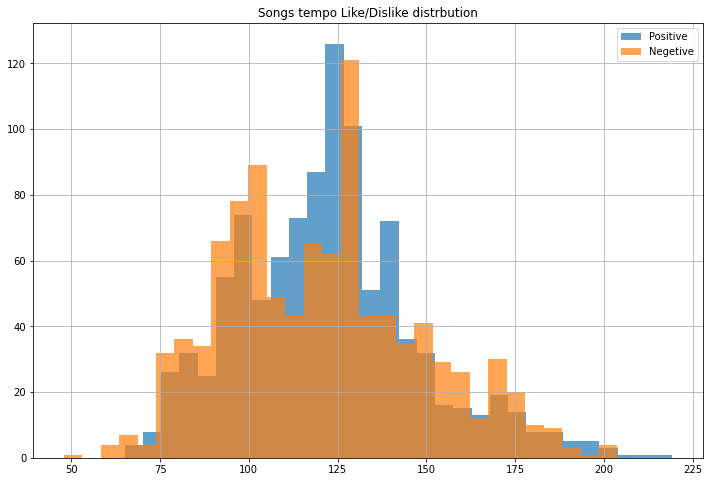

In [23]:
fig = plt.figure(figsize=(12,8))
plt.title("Songs tempo Like/Dislike distrbution")
pos_tempo.hist(alpha= 0.7 , bins = 30 , label= 'Positive')
neg_tempo.hist(alpha= 0.7 , bins = 30 , label= 'Negetive')
plt.legend(loc='upper right')

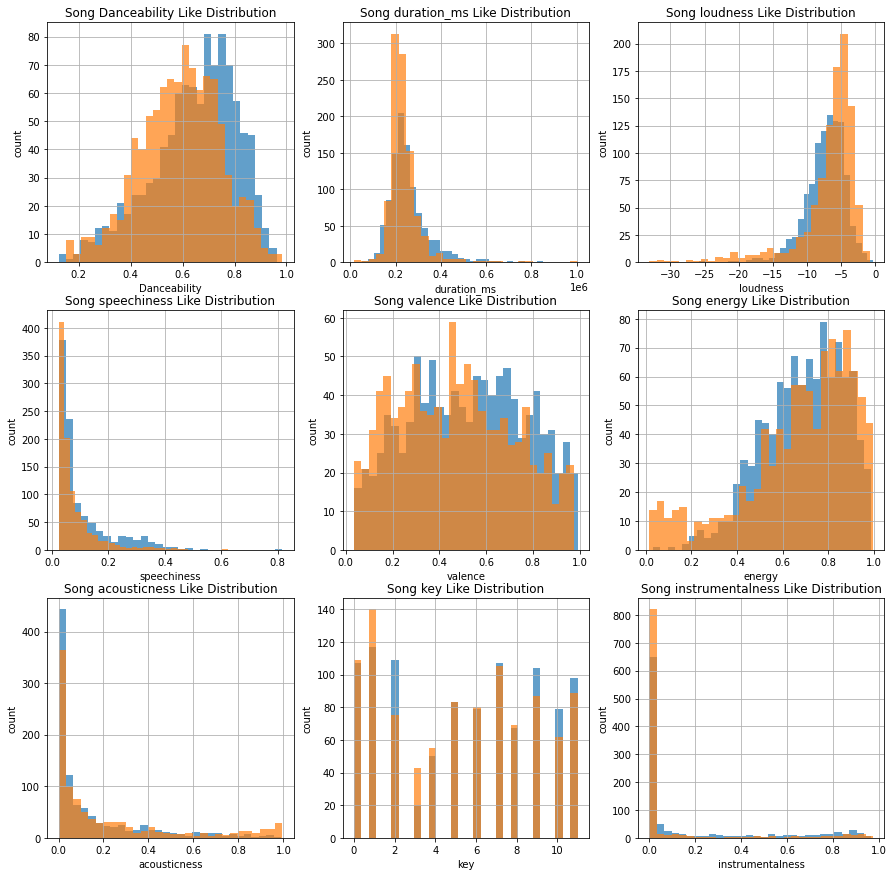

In [32]:
fig2 = plt.figure(figsize=(15,15))

# danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('count')
ax3.set_title('Song Danceability Like Distribution')
pos_danceability.hist(alpha= 0.7 , bins = 30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha= 0.7 , bins = 30)

# duration_ms 
ax4 = fig2.add_subplot(332)
ax4.set_xlabel('duration_ms')
ax4.set_ylabel('count')
ax4.set_title('Song duration_ms Like Distribution')
pos_duration_ms.hist(alpha= 0.7 , bins = 30)
ax5 = fig2.add_subplot(332)
neg_duration_ms.hist(alpha= 0.7 , bins = 30)

# loudness 
ax6 = fig2.add_subplot(333)
ax6.set_xlabel('loudness')
ax6.set_ylabel('count')
ax6.set_title('Song loudness Like Distribution')
pos_loudness.hist(alpha= 0.7 , bins = 30)
ax7 = fig2.add_subplot(333)
neg_loudness.hist(alpha= 0.7 , bins = 30)

# speechiness 
ax8 = fig2.add_subplot(334)
ax8.set_xlabel('speechiness')
ax8.set_ylabel('count')
ax8.set_title('Song speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.7 , bins = 30)
ax9 = fig2.add_subplot(334)
neg_speechiness.hist(alpha= 0.7 , bins = 30)

# valence 
ax10 = fig2.add_subplot(335)
ax10.set_xlabel('valence')
ax10.set_ylabel('count')
ax10.set_title('Song valence Like Distribution')
pos_valence.hist(alpha= 0.7 , bins = 30)
ax11 = fig2.add_subplot(335)
neg_valence.hist(alpha= 0.7 , bins = 30)

# energy
ax12 = fig2.add_subplot(336)
ax12.set_xlabel('energy')
ax12.set_ylabel('count')
ax12.set_title('Song energy Like Distribution')
pos_energy.hist(alpha= 0.7 , bins = 30)
ax13 = fig2.add_subplot(336)
neg_energy.hist(alpha= 0.7 , bins = 30)

# acousticness
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('acousticness')
ax14.set_ylabel('count')
ax14.set_title('Song acousticness Like Distribution')
pos_acousticness.hist(alpha= 0.7 , bins = 30)
ax15 = fig2.add_subplot(337)
neg_acousticness.hist(alpha= 0.7 , bins = 30)

# key
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('key')
ax16.set_ylabel('count')
ax16.set_title('Song key Like Distribution')
pos_key.hist(alpha= 0.7 , bins = 30)
ax17 = fig2.add_subplot(338)
neg_key.hist(alpha= 0.7 , bins = 30)

# instrumentalness
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('instrumentalness')
ax18.set_ylabel('count')
ax18.set_title('Song instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha= 0.7 , bins = 30)
ax19 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha= 0.7 , bins = 30)